In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import pandas as pd

In [2]:
data =pd.read_csv('spam.csv')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

In [12]:
# some information about the training data
print("Number of training samples:", len(X_train))
print("Labels in training data:", set(y_train))

Number of training samples: 4457
Labels in training data: {'ham', 'spam'}


In [13]:
# Create a pipeline with a modified CountVectorizer and Multinomial Naive Bayes classifier
model = make_pipeline(CountVectorizer(stop_words='english', max_features=1000), MultinomialNB())

In [14]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9811659192825112


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [17]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [18]:
# Convert 'ham' and 'spam' labels to binary (0 and 1)
y_true_binary = (y_test == 'spam').astype(int)


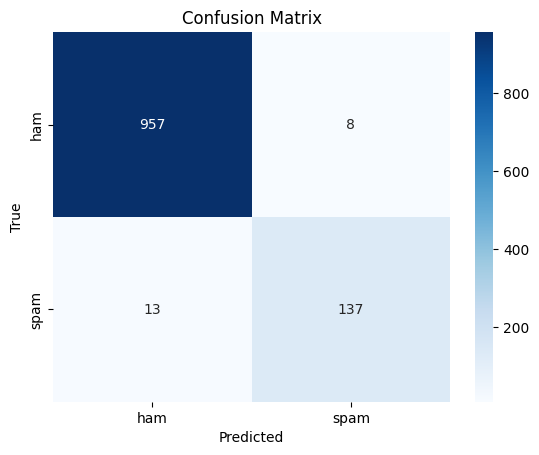

In [19]:
# Plot Confusion Matrix
plot_confusion_matrix(y_true_binary, (y_pred == 'spam').astype(int))

In [20]:
# use the trained model to classify new emails
new_emails = [
    'Congratulations! You have won a prize!',
    'Hi, how are you doing today?',
]

predictions = model.predict(new_emails)


In [21]:
# Print the predictions
for email, prediction in zip(new_emails, predictions):
    print(f'Email: {email}\nPrediction: {prediction}\n')

Email: Congratulations! You have won a prize!
Prediction: spam

Email: Hi, how are you doing today?
Prediction: ham

